In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("../")

import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from accuracy_metrics.accuracy_utils import canonicalize_smiles, sort_fragments_by_heavy_atom


In [2]:
em = pd.read_csv("../examples/results/accuracy_exact_match.csv")
stereo = pd.read_csv("../examples/results/accuracy_stereochemistry_agnostic.csv")
synthon = pd.read_csv("../examples/results/accuracy_synthon.csv")
superset = pd.read_csv("../examples/results/accuracy_superset.csv")
two_step_superset = pd.read_csv("../examples/results/accuracy_two_step_superset.csv")

predictions = pd.read_csv("../examples/results/assigned_predictions.csv")

dfs = [em, stereo, synthon, superset, two_step_superset]
labels = ["em", "stereo", "synthon", "superset", "two_step_superset"]

top5_dfs = [df[["id", "cand_precursor_5"]].rename(columns={"cand_precursor_5": f"{lbl}_top5"}) for df, lbl in zip(dfs, labels)]

predictions_w_top5_accuracy = predictions
for df in top5_dfs:
    predictions_w_top5_accuracy = predictions_w_top5_accuracy.merge(df, on="id", how="left")

In [3]:
prediction_2nd_run = pd.read_csv("../examples/results/second_run/cand_1_assigned_predictions.csv")

================================================== 98097 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    0.0
Top-5 synthon                     0.0
Top-5 superset                    0.0
Top-5 two-step superset           0.0
Name: 0, dtype: object


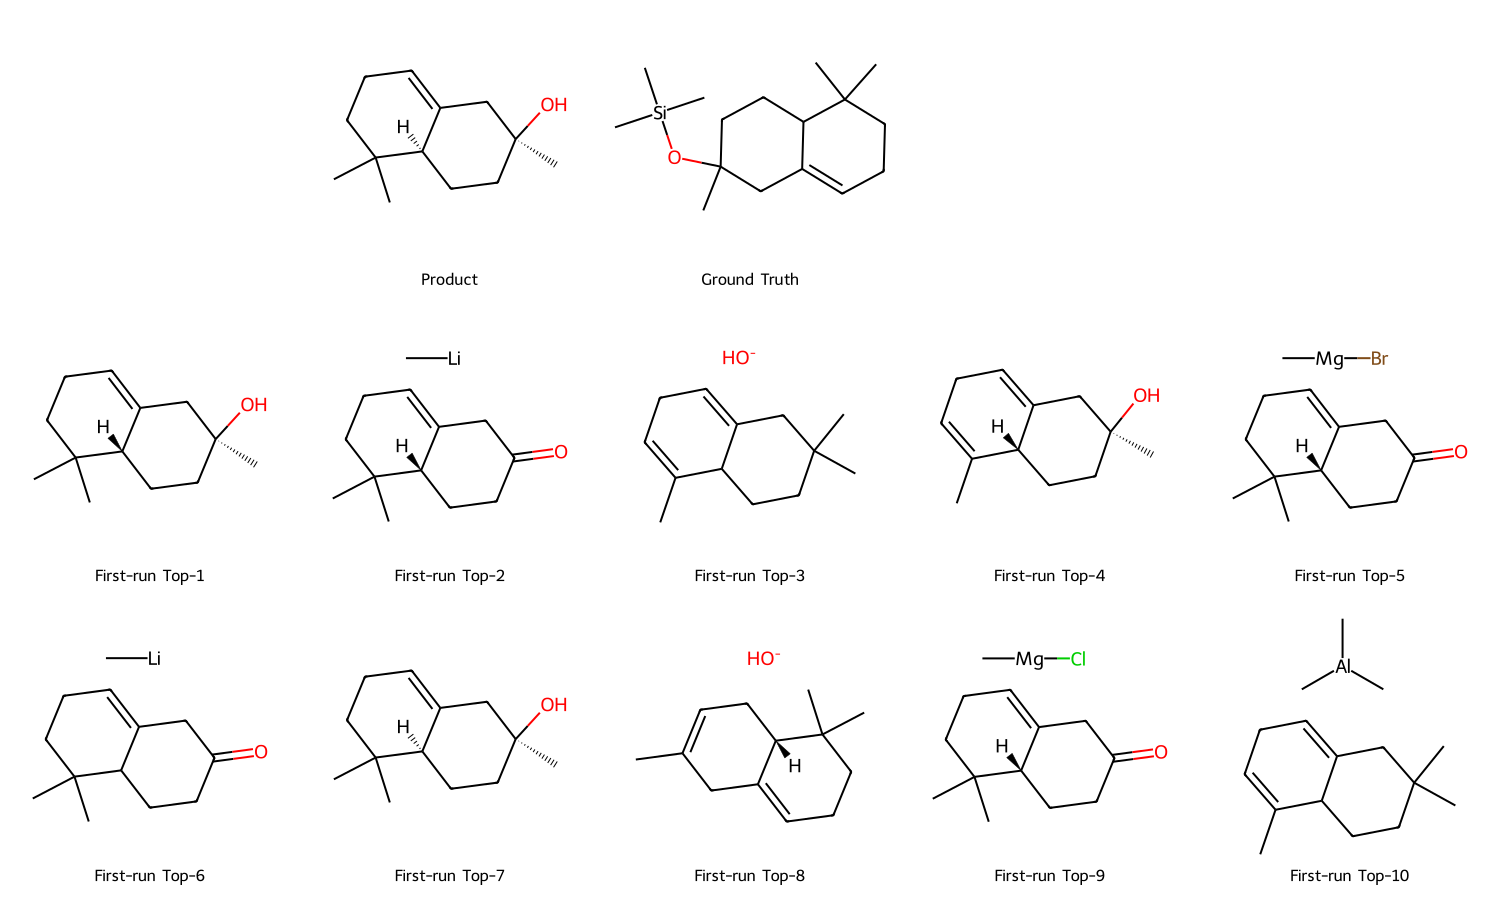

================================================== 132873 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    0.0
Top-5 synthon                     1.0
Top-5 superset                    1.0
Top-5 two-step superset           1.0
Name: 1, dtype: object


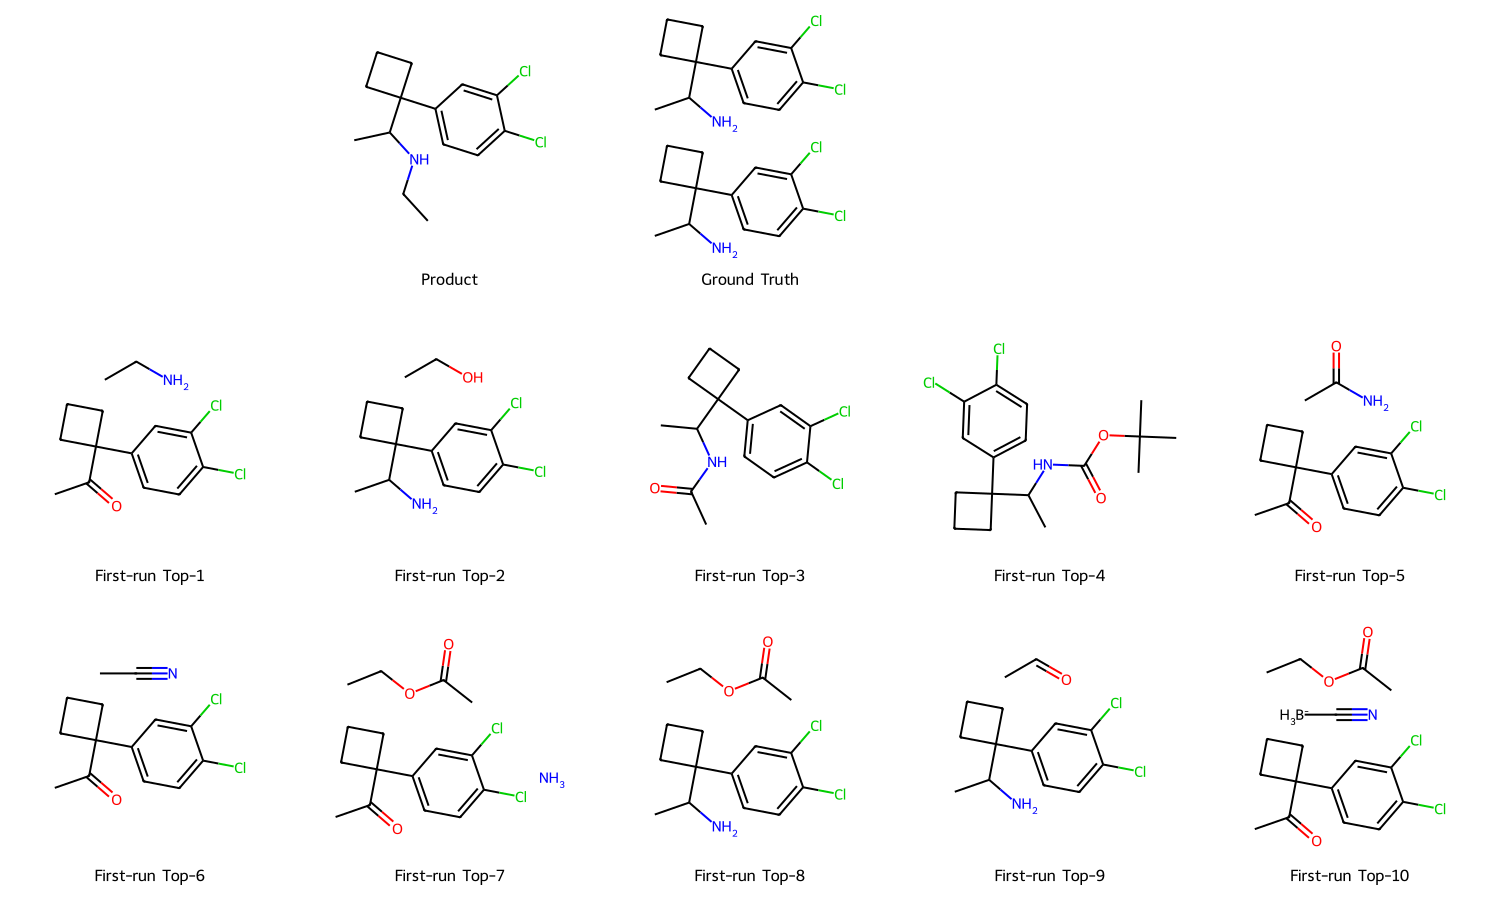

================================================== 144853 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    0.0
Top-5 synthon                     0.0
Top-5 superset                    0.0
Top-5 two-step superset           1.0
Name: 2, dtype: object


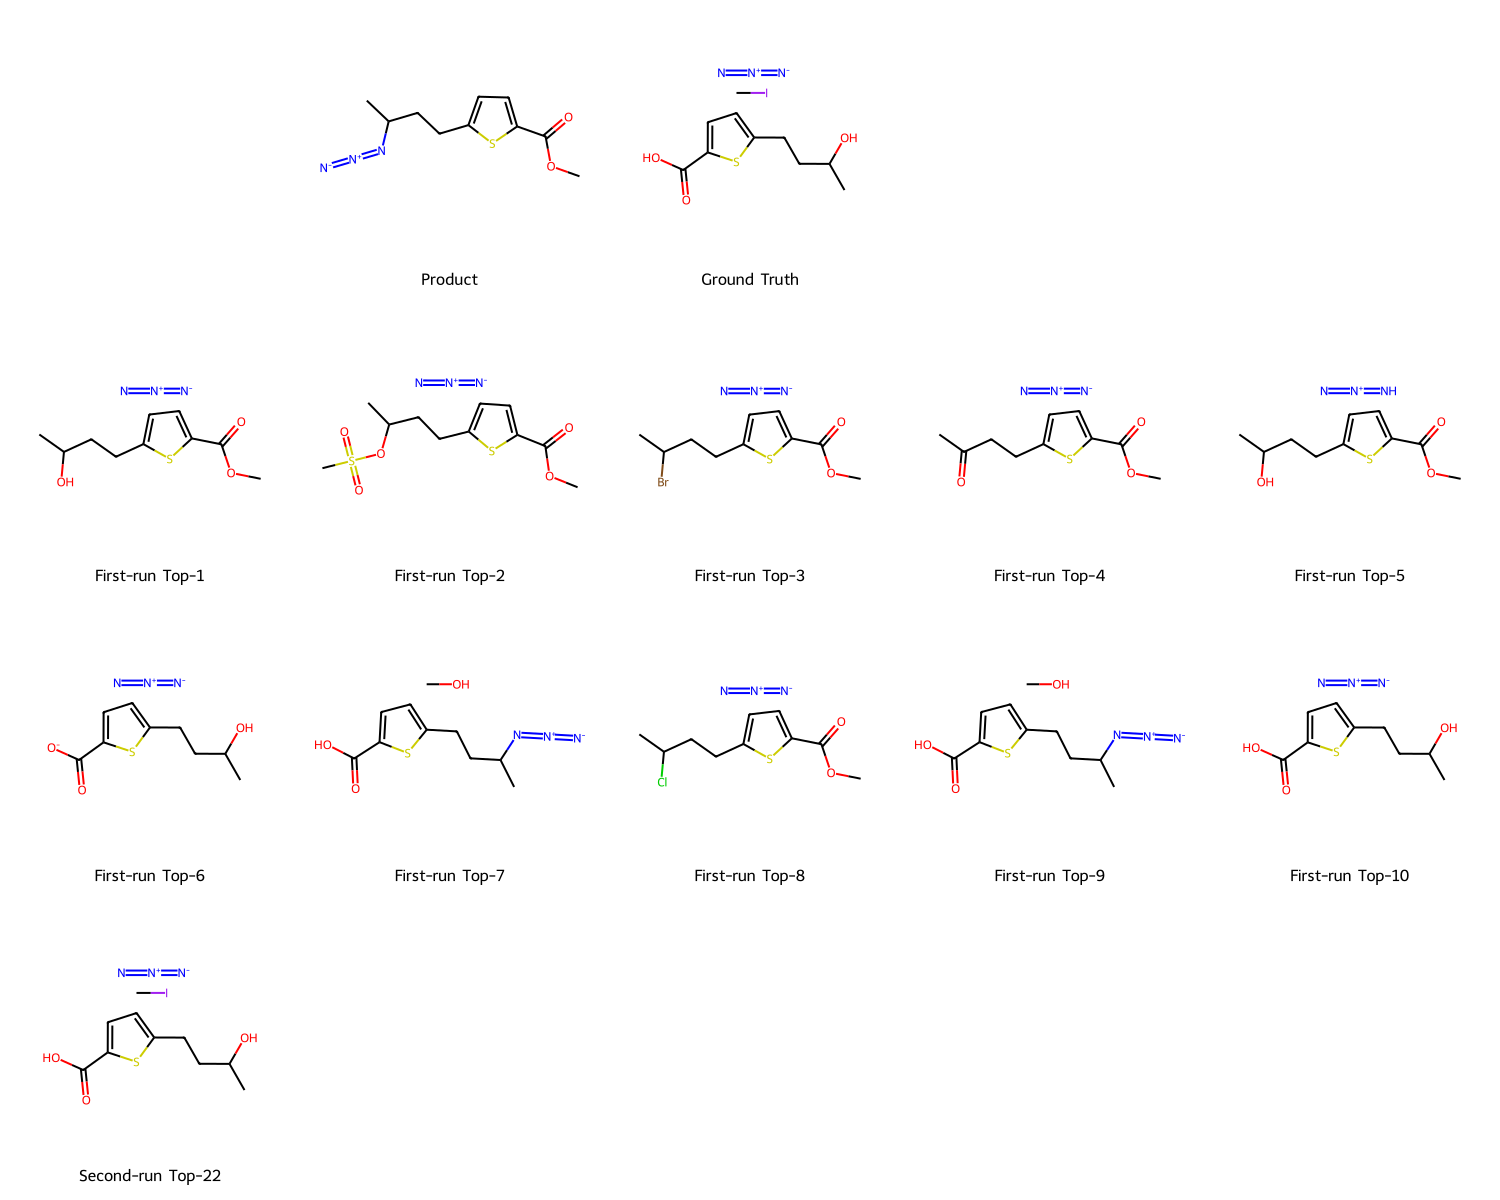

================================================== 146212 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    0.0
Top-5 synthon                     1.0
Top-5 superset                    0.0
Top-5 two-step superset           0.0
Name: 3, dtype: object


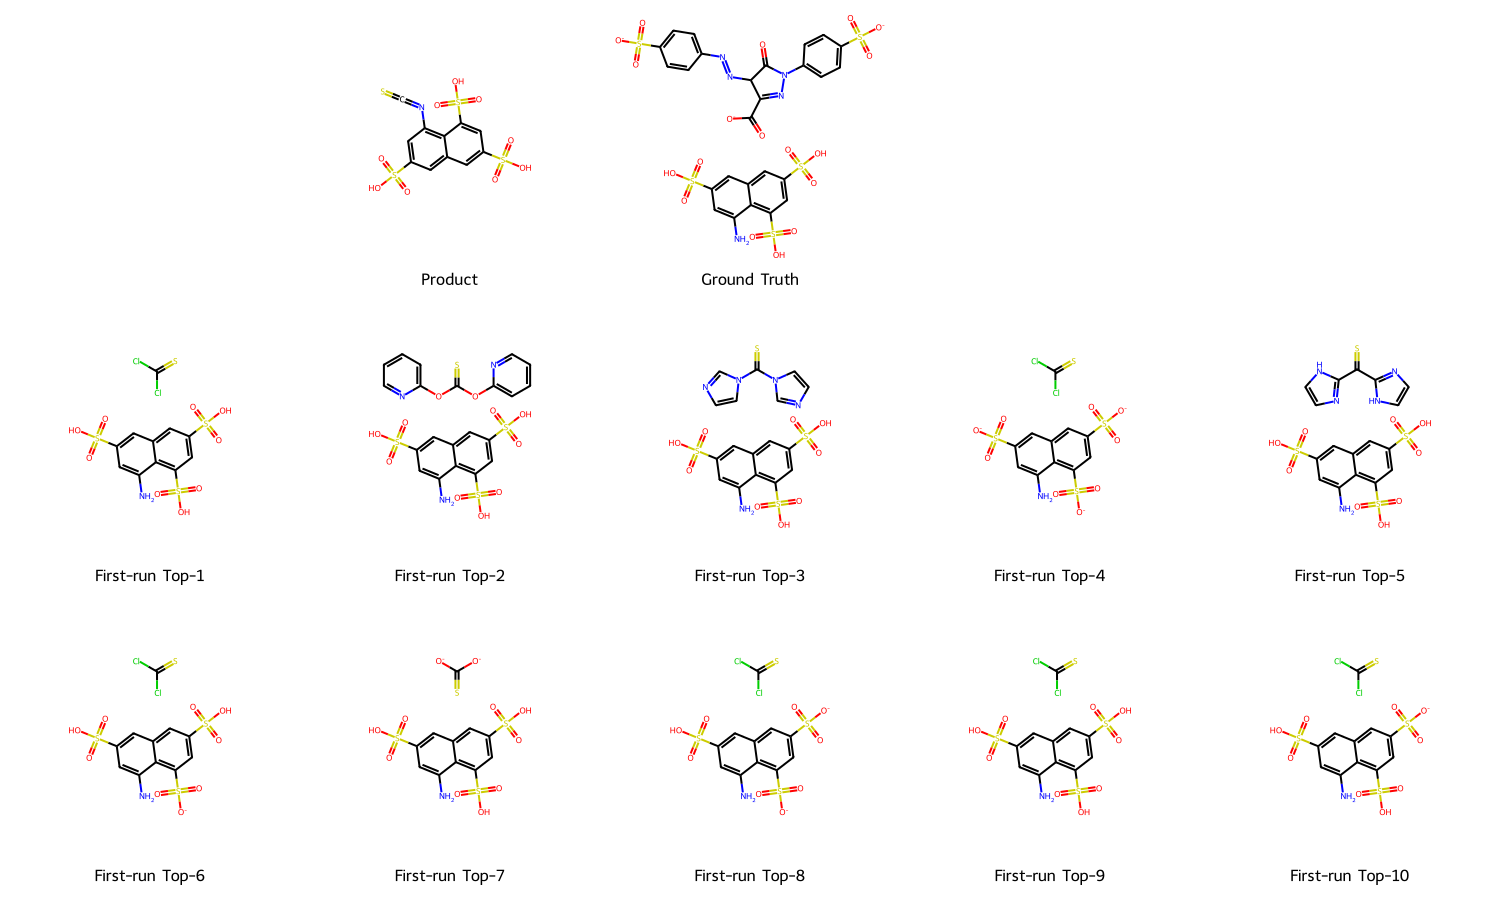

================================================== 272999 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    1.0
Top-5 synthon                     0.0
Top-5 superset                    0.0
Top-5 two-step superset           0.0
Name: 4, dtype: object


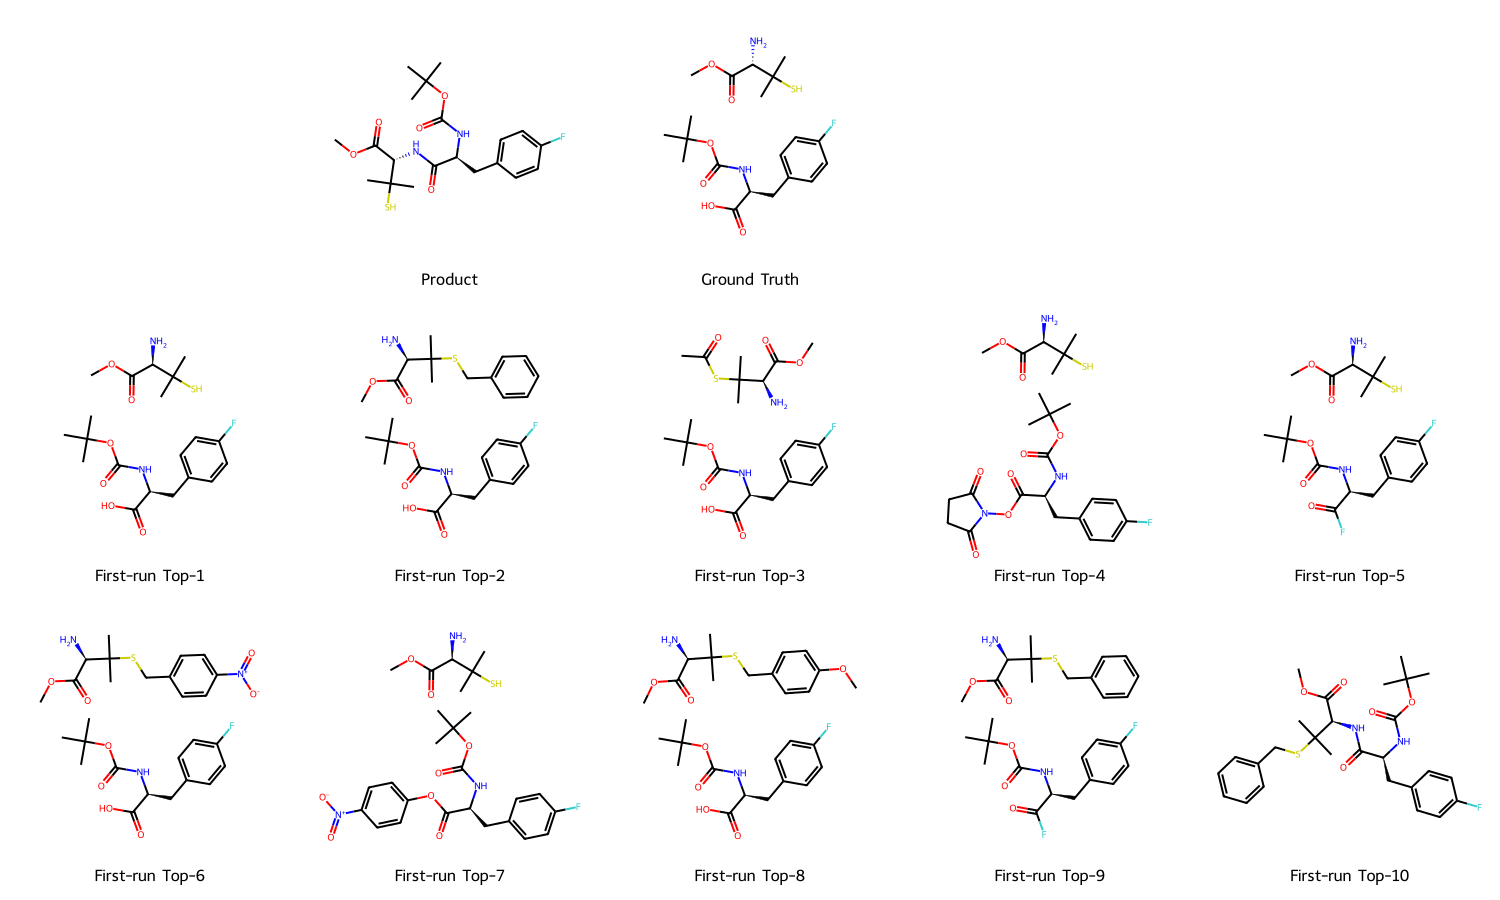

================================================== 285697 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    1.0
Top-5 synthon                     0.0
Top-5 superset                    0.0
Top-5 two-step superset           0.0
Name: 5, dtype: object


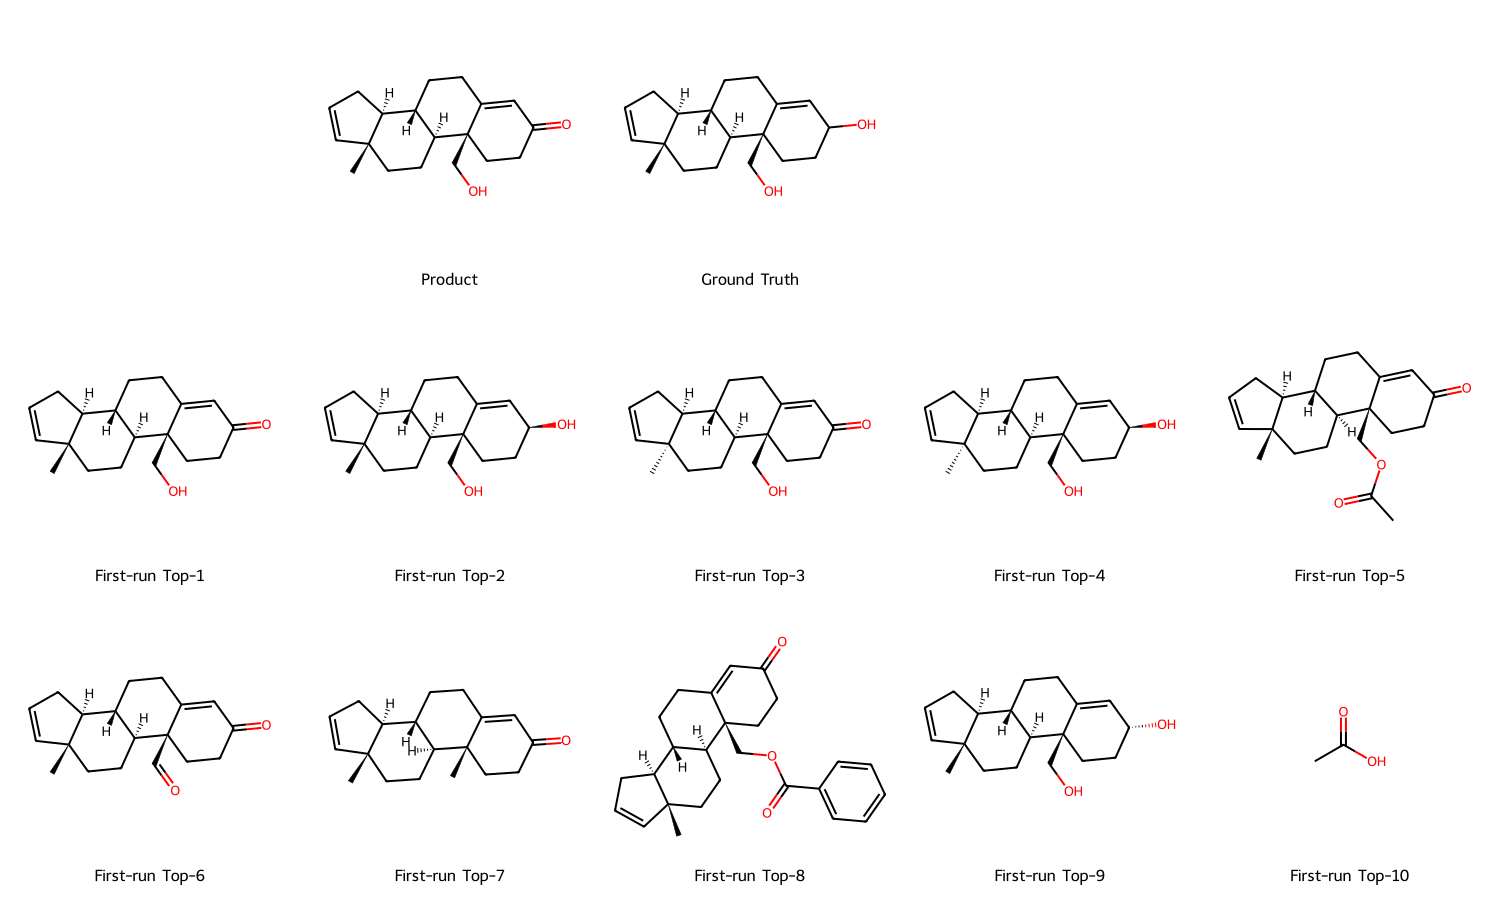

================================================== 534283 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    0.0
Top-5 synthon                     1.0
Top-5 superset                    1.0
Top-5 two-step superset           1.0
Name: 6, dtype: object
First-run prediction 2 CC(C)(C)OC(=O)N1CC2(CNC2)C1.CON=C1CBr.O=C(O)c1cn(C2CC2)c2cc(F)c(F)cc2c1=O has invalid reactant CON=C1CBr
First-run prediction 5 CC(C)(C)OC(=O)N1CC2(CNC2)C1.CON=C1CBr)CN(c2cc3c(cc2F)c(=O)c(C(=O)O)cn3C2CC2)C1 has invalid reactant CON=C1CBr)CN(c2cc3c(cc2F)c(=O)c(C(=O)O)cn3C2CC2)C1


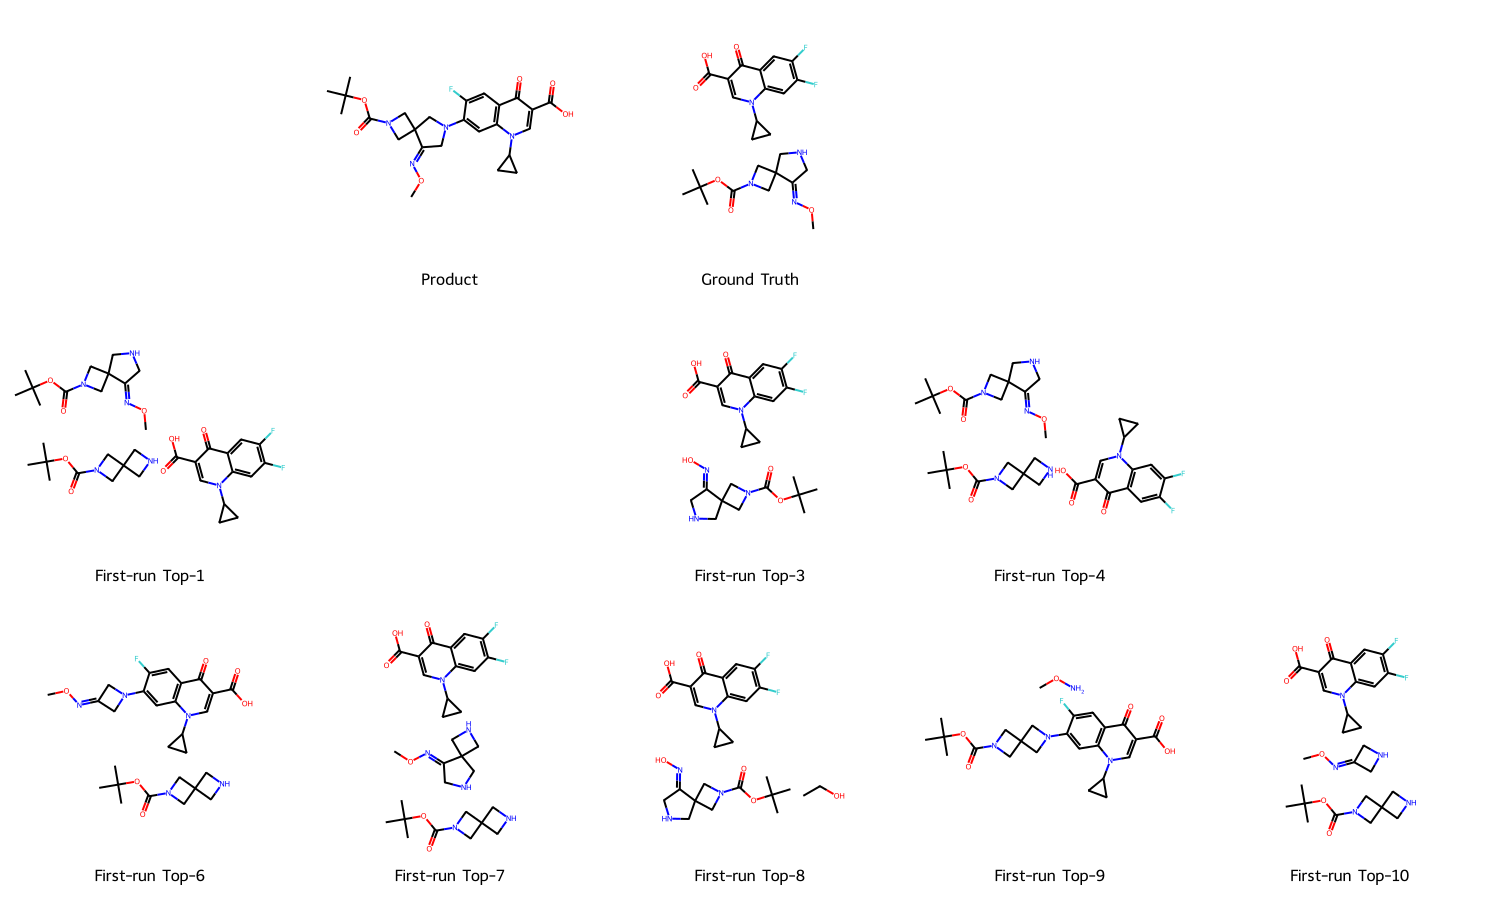

================================================== 546314 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    0.0
Top-5 synthon                     0.0
Top-5 superset                    0.0
Top-5 two-step superset           1.0
Name: 7, dtype: object


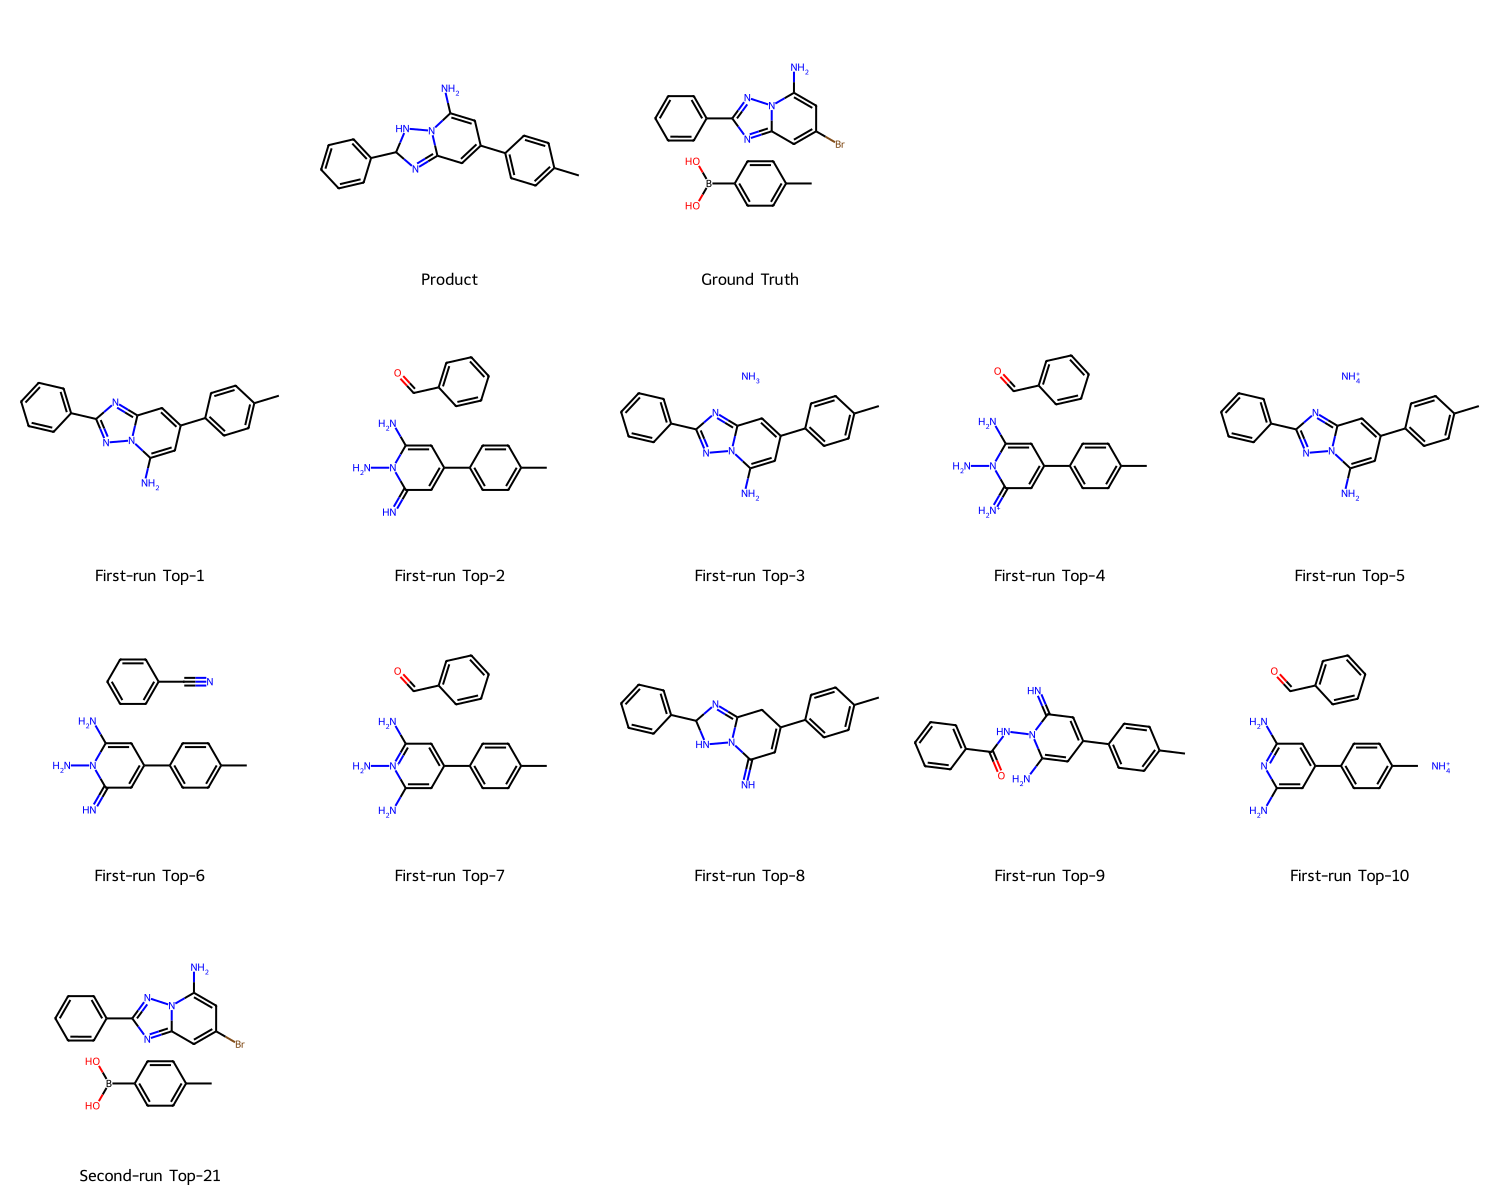

================================================== 855452 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    0.0
Top-5 synthon                     1.0
Top-5 superset                    0.0
Top-5 two-step superset           1.0
Name: 8, dtype: object


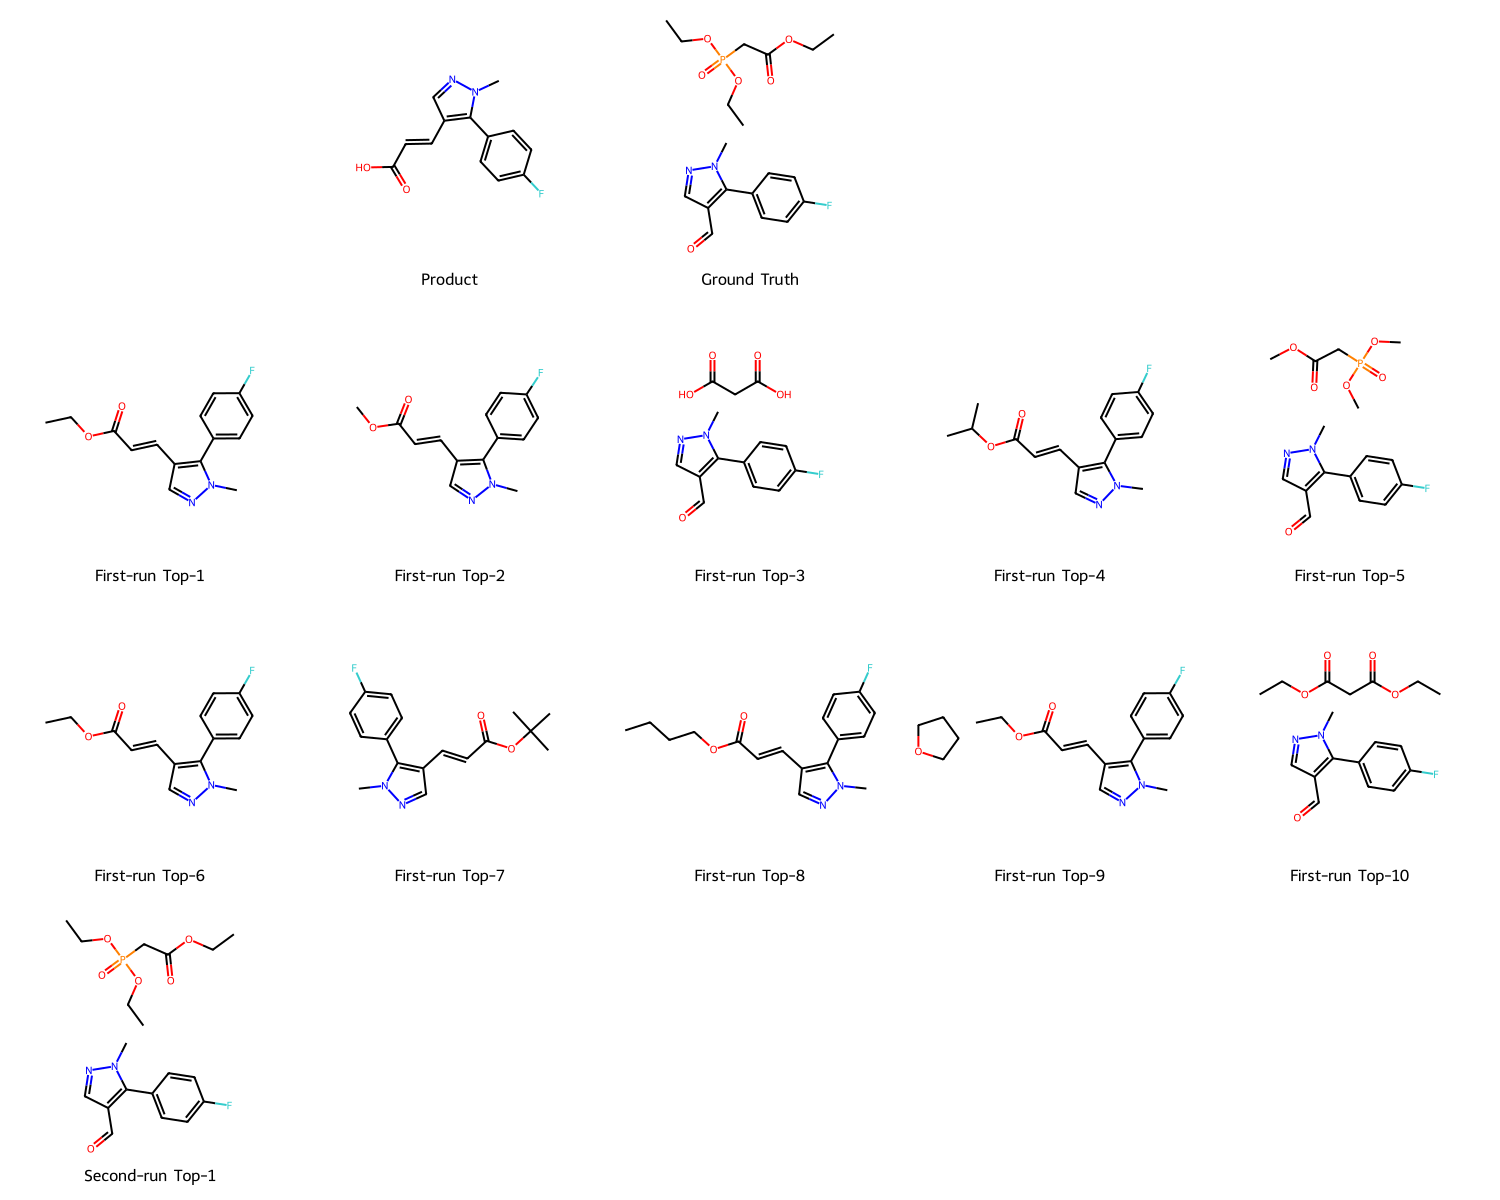

================================================== 891389 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    1.0
Top-5 synthon                     1.0
Top-5 superset                    0.0
Top-5 two-step superset           0.0
Name: 9, dtype: object


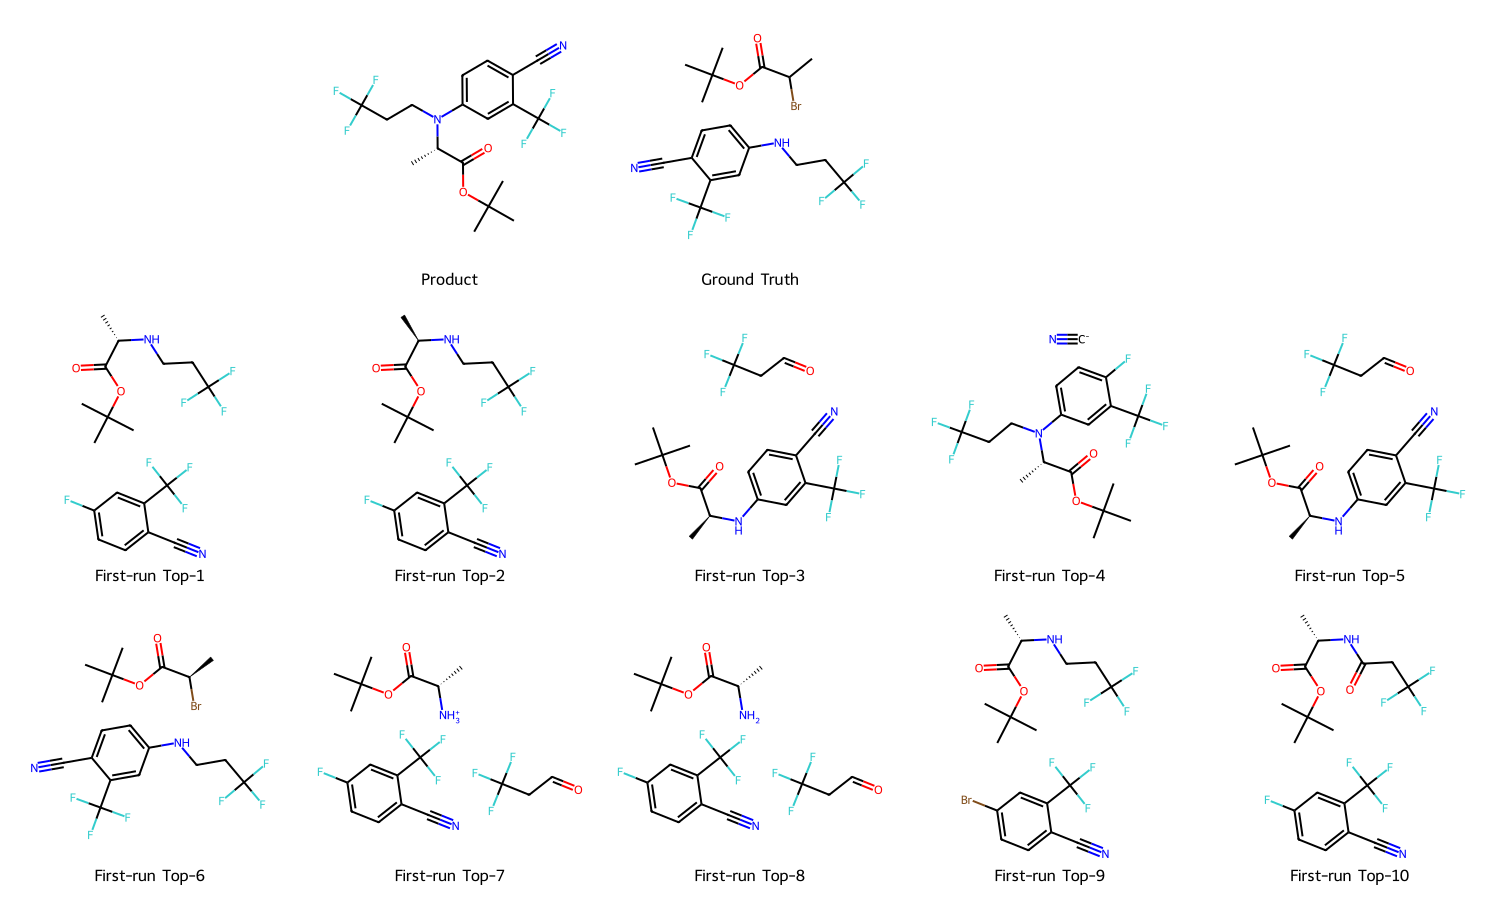

================================================== 971424 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    0.0
Top-5 synthon                     0.0
Top-5 superset                    0.0
Top-5 two-step superset           0.0
Name: 10, dtype: object


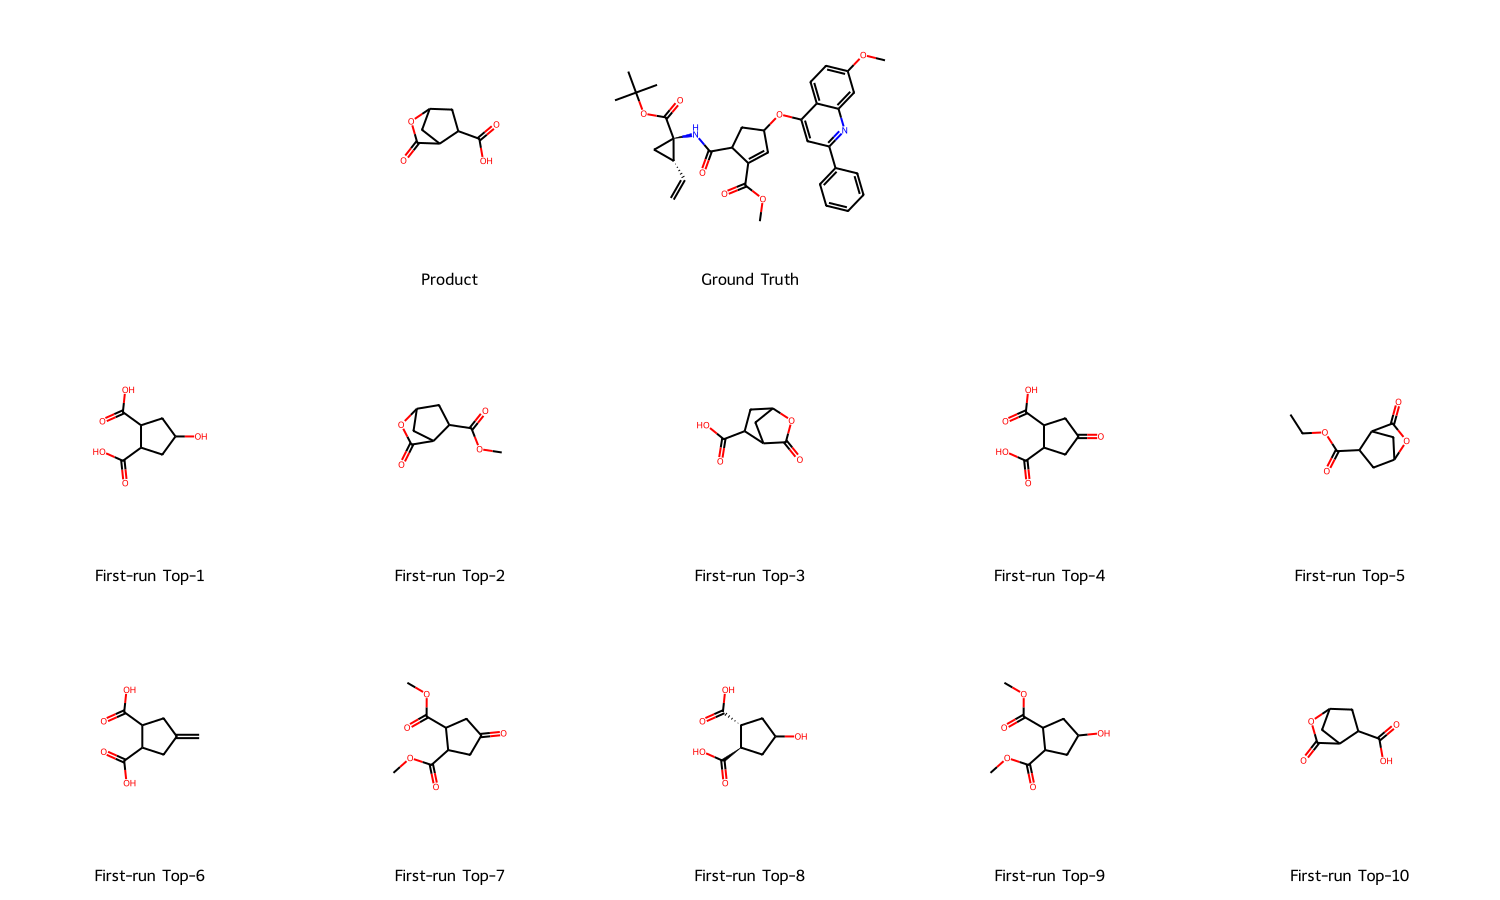

================================================== 1046692 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    0.0
Top-5 synthon                     1.0
Top-5 superset                    0.0
Top-5 two-step superset           0.0
Name: 11, dtype: object


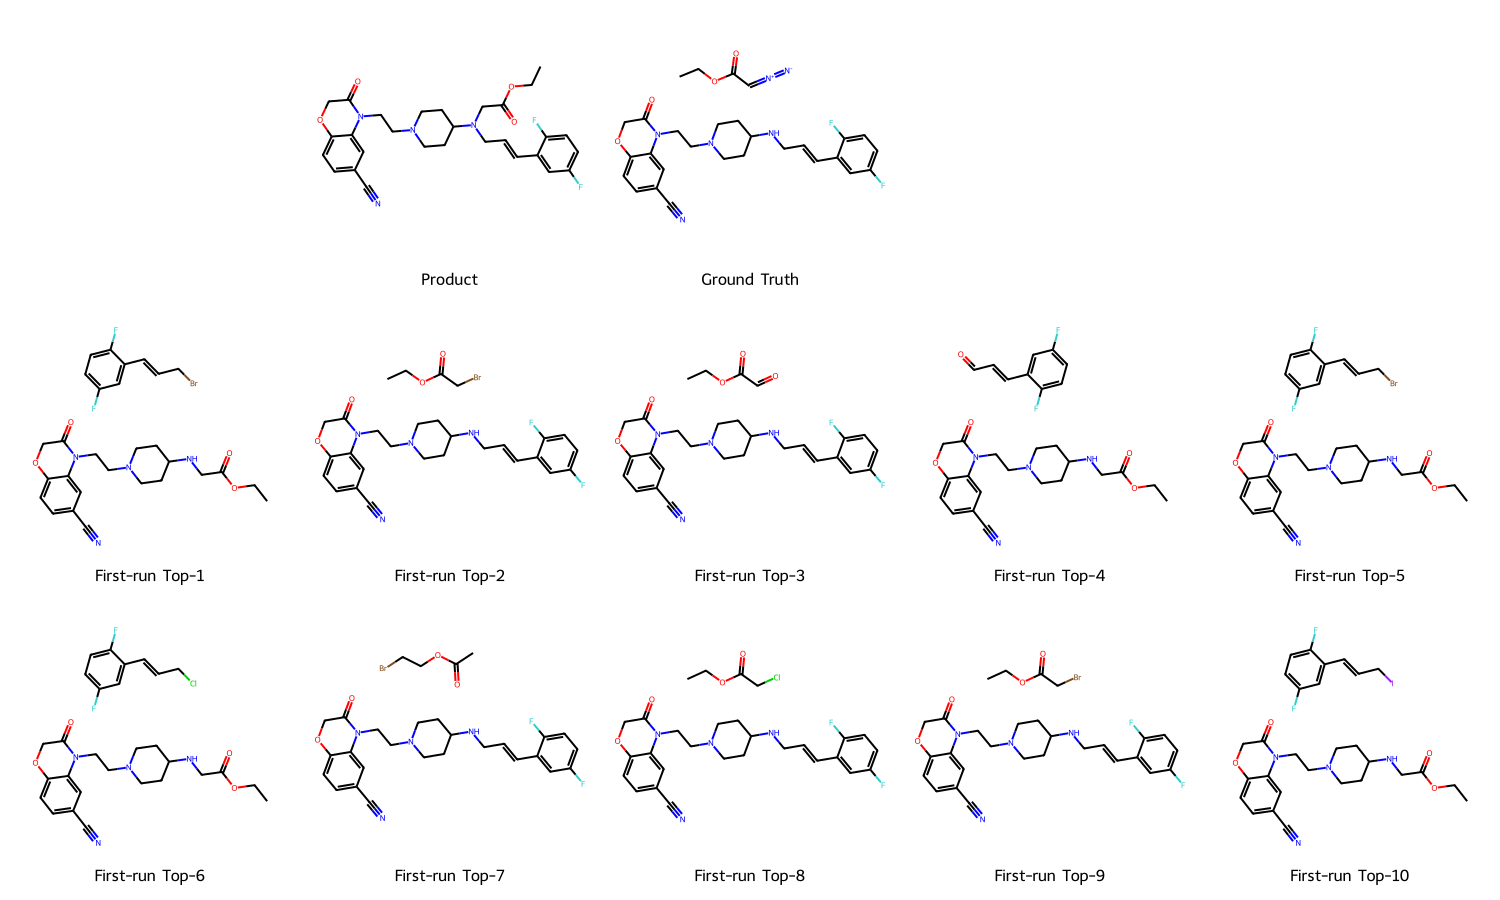

================================================== 1204457 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    0.0
Top-5 synthon                     0.0
Top-5 superset                    0.0
Top-5 two-step superset           0.0
Name: 12, dtype: object


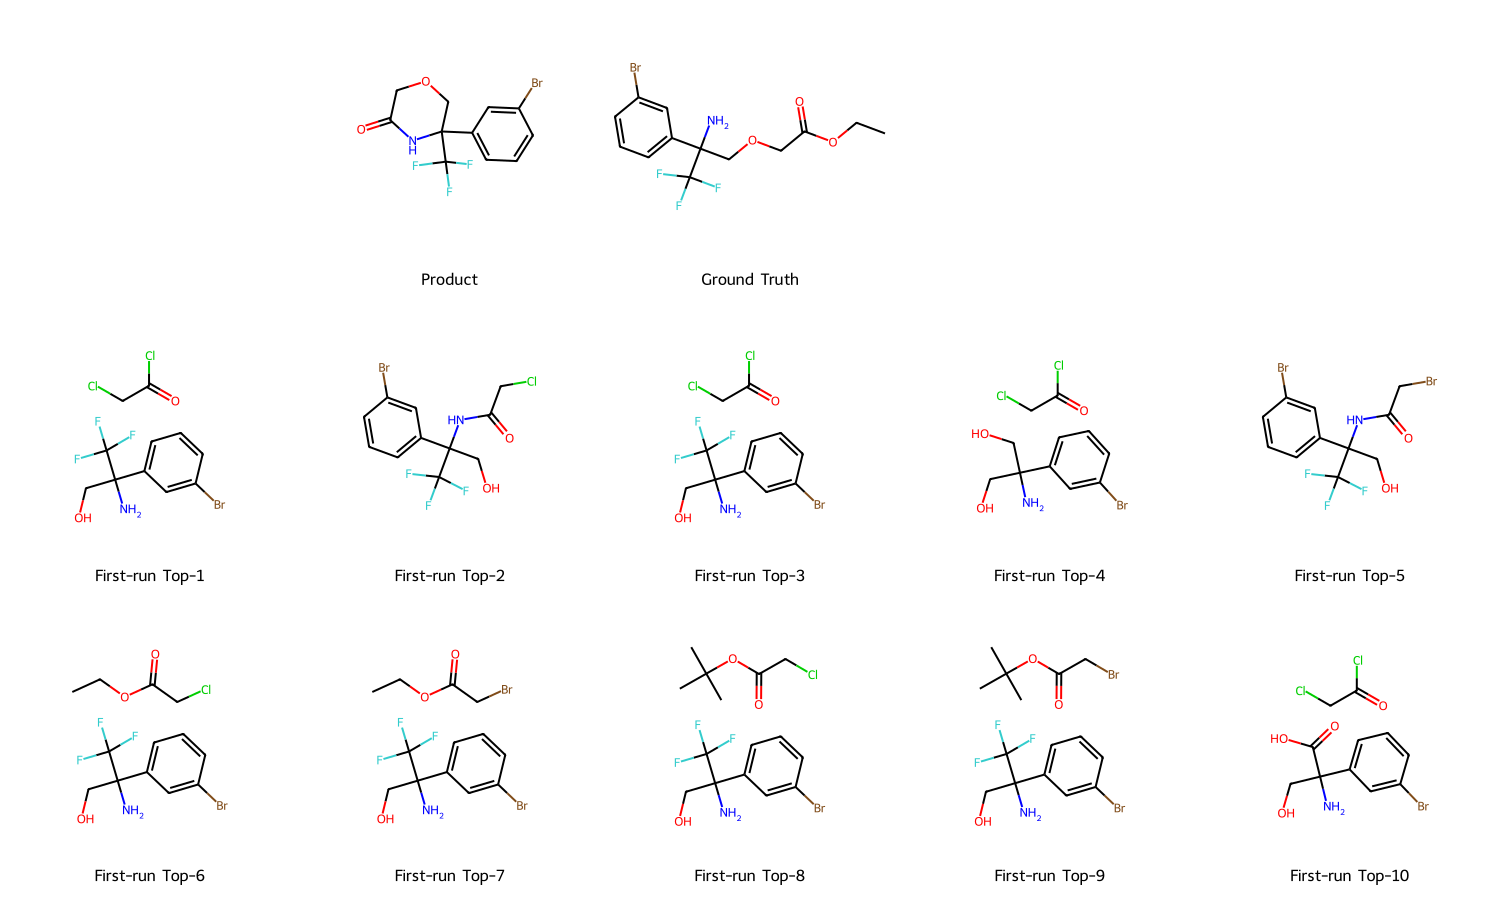

================================================== 1280808 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    0.0
Top-5 synthon                     1.0
Top-5 superset                    1.0
Top-5 two-step superset           1.0
Name: 13, dtype: object


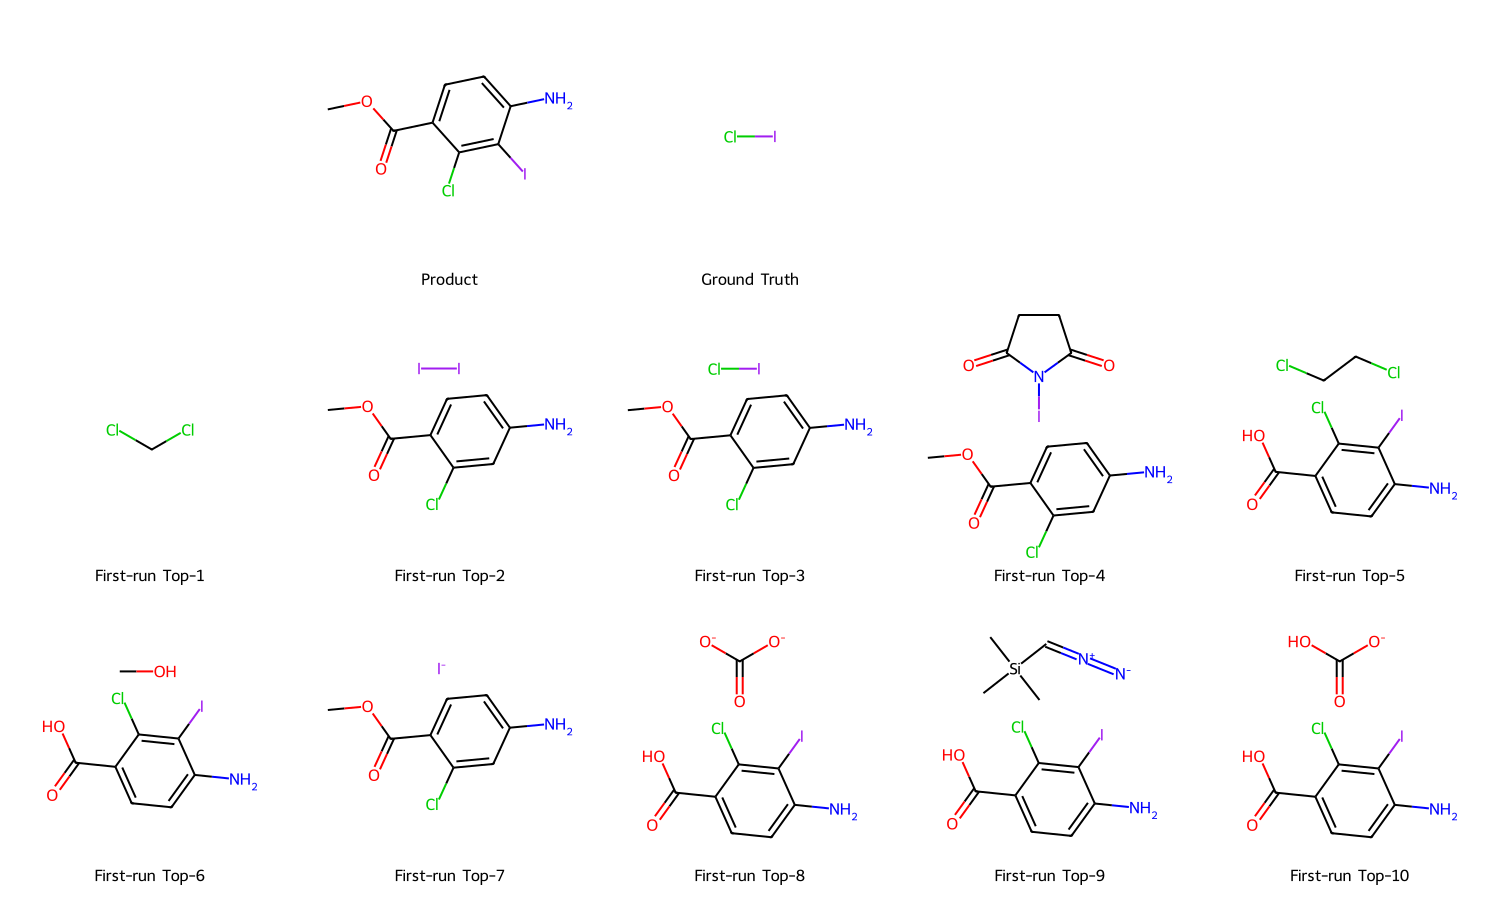

================================================== 1306853 ==================================================
Top-5 Exact match                 0.0
Top-5 stereochemistry-agnostic    1.0
Top-5 synthon                     0.0
Top-5 superset                    0.0
Top-5 two-step superset           0.0
Name: 14, dtype: object


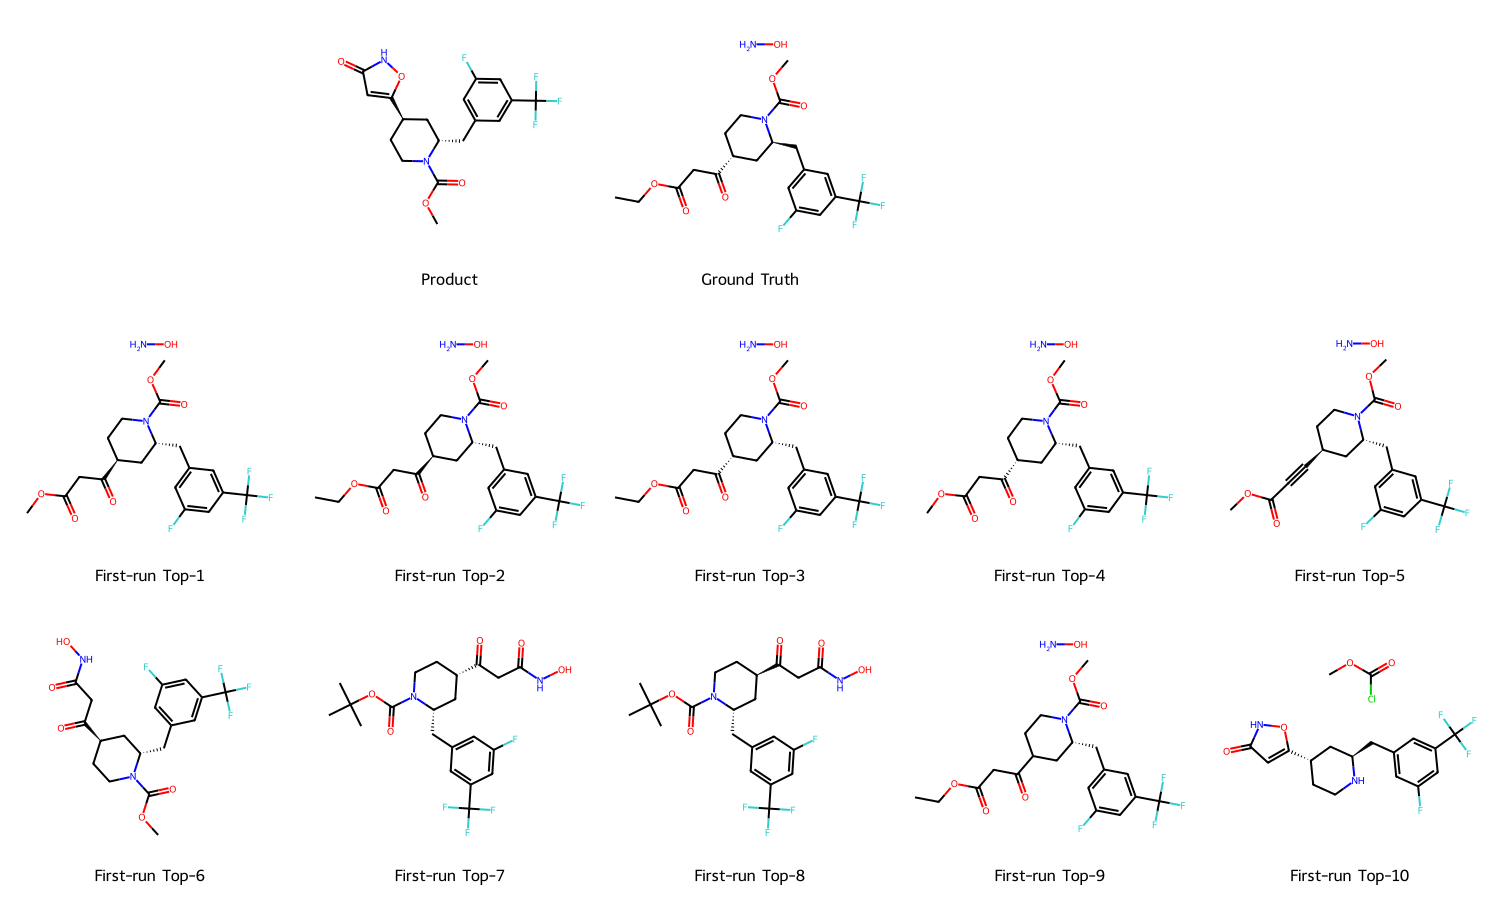

In [4]:
accuracy_cols_renamed = {
    "em_top5": "Top-5 Exact match",
    "stereo_top5": "Top-5 stereochemistry-agnostic",
    "synthon_top5": "Top-5 synthon",
    "superset_top5": "Top-5 superset",
    "two_step_superset_top5": "Top-5 two-step superset"
}
predictions_w_top5_accuracy.rename(columns=accuracy_cols_renamed, inplace=True)


for _, row in predictions_w_top5_accuracy.iterrows():
    id = row["id"]
    print("="*50, id, "="*50)
    print(row[accuracy_cols_renamed.values()])
    rxn_smiles = row["rxn_smiles"]
    gt_smiles, _, prod_smiles = rxn_smiles.split(">")
    gt = canonicalize_smiles(gt_smiles)
    prod = canonicalize_smiles(prod_smiles)

    header_mols = [Chem.MolFromSmiles(prod), Chem.MolFromSmiles(gt)]
    header_labels = ["Product", "Ground Truth"]
    first_run_mols = []
    first_run_labels = []
    second_run_mols = []
    second_run_labels = []

    for i in range(1, 11):
        col = f"cand_precursor_{i}"
        first_run_labels.append(f"First-run Top-{i}")

        # to detect prediction that fails to canonicalize
        prediction = canonicalize_smiles(row[col])
        if prediction is None:
            preds = row[col].split(".")
            invalid_preds = []
            for pred in preds:
                if Chem.MolFromSmiles(pred) is  None:
                    invalid_preds.append(pred)
            print(f"First-run prediction {i} {row[col]} has invalid reactant {".".join(invalid_preds)}")
        
        first_run_mols.append(Chem.MolFromSmiles(row[col]))

    # PLOT 1ST RUN PREDICTIONS
    first_row_mols = [None, header_mols[0], header_mols[1], None, None]
    first_row_labels = [""] + [header_labels[0], header_labels[1]] + [""] * 2
    row_mols = first_run_mols
    row_labels = first_run_labels

    all_mols = first_row_mols + row_mols
    all_labels = first_row_labels + row_labels
    

    # PLOT 2ND RUN PREDICTIONS if needed
    # if superset is not correct but two-step superset is correct, also draw the second-run predictions that is correct
    if row["Top-5 superset"] == 0 and row["Top-5 two-step superset"] == 1:
        # the example was picked if the first-run superset is not correct, and the second-run two-step superset is correct at cand_1 so only load cand_1 here
        cand_precursor_smiles_fragements = sort_fragments_by_heavy_atom(row["cand_precursor_1"].split("."))
        largest_fragment = cand_precursor_smiles_fragements[0]
        smaller_fragments = ".".join(cand_precursor_smiles_fragements[1:])
        prediction_2nd_run_row = prediction_2nd_run[prediction_2nd_run["prod_smi"] == largest_fragment].iloc[0]
        for i in range(50):
            second_pass_pred = prediction_2nd_run_row[f"cand_precursor_{i+1}"]
            if pd.isna(smaller_fragments) or smaller_fragments == "":
                    prediction = canonicalize_smiles(second_pass_pred)
            else:
                if isinstance(smaller_fragments, str) and smaller_fragments.strip() != "":
                    prediction = canonicalize_smiles(second_pass_pred + "." + smaller_fragments)
                else:
                    prediction = canonicalize_smiles(second_pass_pred)
            if prediction is None:
                continue
            prediction_set = set(prediction.split("."))
            gt_set = set(gt.split("."))
            if prediction_set.issuperset(gt_set): 
                second_run_mols.append(Chem.MolFromSmiles(prediction))
                second_run_labels.append(f"Second-run Top-{i+1}")
                all_mols = all_mols + second_run_mols
                all_labels = all_labels + second_run_labels
                break
    
    
    img = Draw.MolsToGridImage(
        all_mols,
        molsPerRow=5,
        subImgSize=(300, 300),
        legends=all_labels,
        useSVG=False
    )
    
    display(img)